# Required Packages, Modules and Utilities

In [1]:
# Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.model_selection import train_test_split

# Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, RocCurveDisplay

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

# Random seed for reproducibility
seed = 42
np.random.seed(seed)

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from transformers import BertTokenizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMOLADE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Extraction

In [3]:
filename = "Truth_Seeker_Model_Dataset.csv"

# Import csv file to DataFrame format
news_data = pd.read_csv(filename)

# Print the first five rows of the file
print(news_data.head())

   Unnamed: 0      author                                          statement  \
0           0  D.L. Davis  End of eviction moratorium means millions of A...   
1           1  D.L. Davis  End of eviction moratorium means millions of A...   
2           2  D.L. Davis  End of eviction moratorium means millions of A...   
3           3  D.L. Davis  End of eviction moratorium means millions of A...   
4           4  D.L. Davis  End of eviction moratorium means millions of A...   

   target  BinaryNumTarget                 manual_keywords  \
0    True              1.0  Americans, eviction moratorium   
1    True              1.0  Americans, eviction moratorium   
2    True              1.0  Americans, eviction moratorium   
3    True              1.0  Americans, eviction moratorium   
4    True              1.0  Americans, eviction moratorium   

                                               tweet 5_label_majority_answer  \
0  @POTUS Biden Blunders - 6 Month Update\n\nInfl...            Mo

In [4]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               134198 non-null  int64  
 1   author                   134198 non-null  object 
 2   statement                134198 non-null  object 
 3   target                   134198 non-null  bool   
 4   BinaryNumTarget          134198 non-null  float64
 5   manual_keywords          134198 non-null  object 
 6   tweet                    134198 non-null  object 
 7   5_label_majority_answer  134198 non-null  object 
 8   3_label_majority_answer  134198 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 8.3+ MB


# Data Preprocessing

In [5]:
df = news_data[['BinaryNumTarget', 'tweet']]

In [6]:
stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()

def data_preprocessing(text):
    # Remove all mentions
    text = re.sub(r'@\w+', '', text)

    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all symbols from the 'tweet' column
    text = re.sub(r'[^\w\s]', '', text)

    # Remove words that come immediately after numbers (e.g., "19th")
    text = re.sub(r'\d+\w*', '', text)

    # Remove all numeric digits (this will take care of any standalone digits that are left)
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace: leading and trailing whitespace
    text = text.strip()

    # Replace multiple whitespace characters (\s+) with a single space
    text = re.sub(r'\s+', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Removal of stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)

    text = ' '.join(stemmer.stem(word) for word in text.split())

    # Return the processed text
    return text


# Apply the function to the column
df['tweet'] = df['tweet'].apply(data_preprocessing)

print(df.head())

   BinaryNumTarget                                              tweet
0              1.0  biden blunder month updat inflat delta mismana...
1              1.0  mani peopl liter starv street centuri isnt cap...
2              1.0  suprem court side super rich properti owner po...
3              1.0  biden blunder broken campaign promis inflat de...
4              1.0  agre confluenc event right unpreced afghan dis...


In [7]:
# Extracts the 'tweet' column and convert to list
tweets = list(df['tweet'])
print(tweets[:2])

['biden blunder month updat inflat delta mismanag covid kid abandon american afghanistan arm taliban border crisi break job growth abus power mani exec order reconcili evict moratoriumwhat miss', 'mani peopl liter starv street centuri isnt capit grand meanwhil face evict moratorium threaten make million american homeless fuck corporatist propaganda']


## Data Visualization

In [8]:
news_data['tweet_edited'] = df['tweet']
news_data['tweet_length'] = news_data['tweet_edited'].apply(len)

In [9]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               134198 non-null  int64  
 1   author                   134198 non-null  object 
 2   statement                134198 non-null  object 
 3   target                   134198 non-null  bool   
 4   BinaryNumTarget          134198 non-null  float64
 5   manual_keywords          134198 non-null  object 
 6   tweet                    134198 non-null  object 
 7   5_label_majority_answer  134198 non-null  object 
 8   3_label_majority_answer  134198 non-null  object 
 9   tweet_edited             134198 non-null  object 
 10  tweet_length             134198 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 10.4+ MB


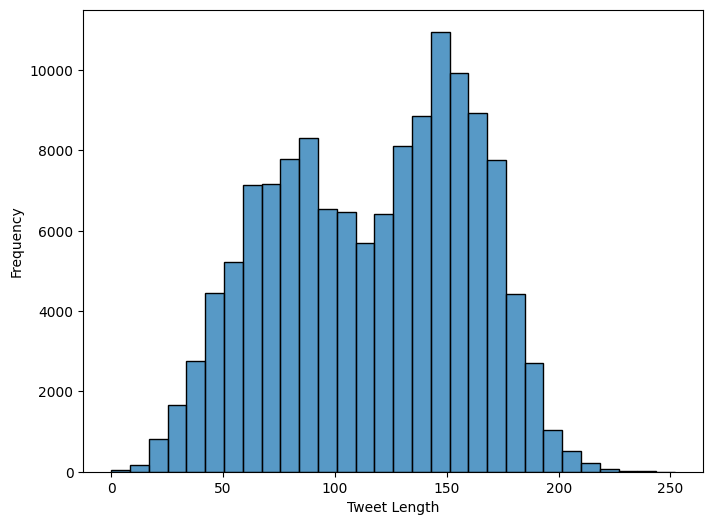

In [10]:
# Histogram for the distribution of tweet length
plt.figure(figsize = (8, 6))
sns.histplot(news_data['tweet_length'], bins=30)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

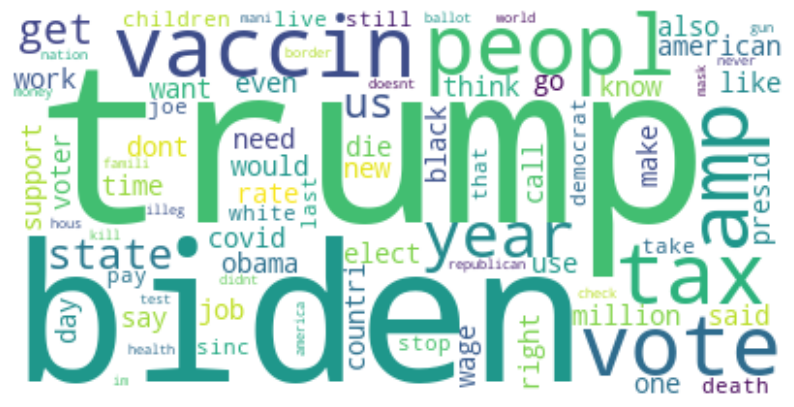

In [11]:
from wordcloud import WordCloud
text = ' '.join(news_data['tweet_edited'])

# Calculate word frequency, count each word only once
word_freq = news_data['tweet_edited'].str.split(expand=True).stack().value_counts().apply(lambda x: 1)

wordcloud = WordCloud(max_words=80, contour_width=3, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize = (10, 9))
# Display the generated image:
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

<Axes: xlabel='target', ylabel='count'>

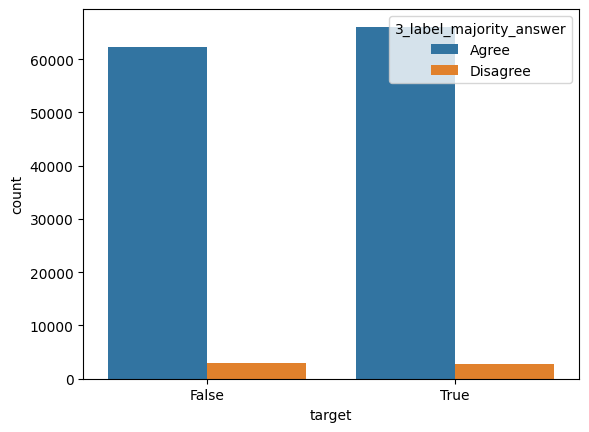

In [12]:
# View the distribution of target within each category of 3_label_majority_answer.
sns.countplot(data=news_data, x='target', hue='3_label_majority_answer')

<Axes: xlabel='target', ylabel='count'>

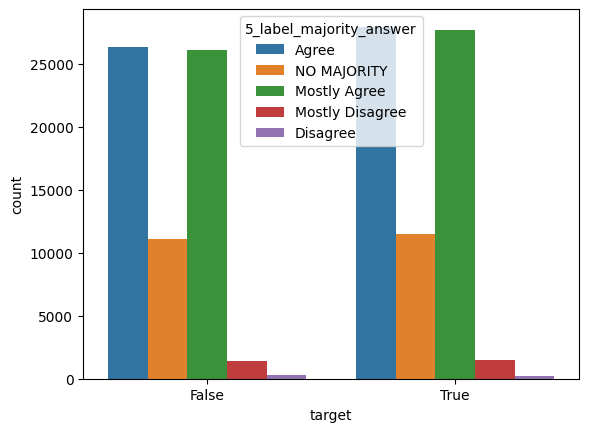

In [13]:
# View the distribution of target within each category of 5_label_majority_answer.
sns.countplot(data=news_data, x='target', hue='5_label_majority_answer')

target
True     68930
False    65268
Name: count, dtype: int64


Text(0, 0.5, 'Count')

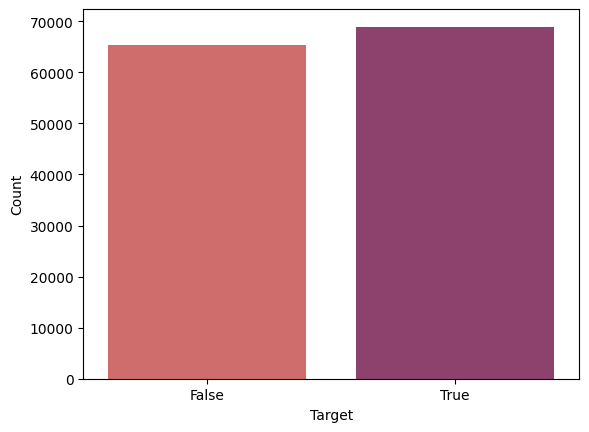

In [14]:
# Number of occurrences for each category
print(news_data['target'].value_counts())

sns.countplot(data=news_data, x='target', palette='flare')
plt.xlabel('Target')
plt.ylabel('Count')

## Data Transformation

In [15]:
'''
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize all texts
tokenized_tweets = [tokenizer.tokenize(tweet) for tweet in tweets]

# Convert tokenized tweets back to strings
tweets = [' '.join(tokens) for tokens in tokenized_tweets]
'''
print('Done!')

Done!


In [16]:
# Use CountVectorizer to convert tokens to feature vectors

# Initialize the Count Vectorizer
vectorizer = CountVectorizer(
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        max_features = 3000) # Extract 3000 Features

# Fit the vectorizer on the tweets
vectorizer = vectorizer.fit(tweets)

tweet_transformed = vectorizer.transform(tweets)

In [17]:
# Convert sparse matrix of tweet data into dense matrix
train_feature_vectors = tweet_transformed.todense()

# Get features names from vectorizer
training_features = pd.DataFrame(train_feature_vectors, columns = vectorizer.get_feature_names_out())

print(training_features.shape)
print(training_features.head())

(134198, 3000)
   aaron  abandon  abbott  abil  abl  ablaz  abolish  abort  absente  absolut  \
0      0        1       0     0    0      0        0      0        0        0   
1      0        0       0     0    0      0        0      0        0        0   
2      0        0       0     0    0      0        0      0        0        0   
3      0        1       0     0    0      0        0      0        0        0   
4      0        0       0     0    0      0        0      0        0        0   

   ...  younger  your  youth  youtub  youv  yr  zealand  zero  zombi  zone  
0  ...        0     0      0       0     0   0        0     0      0     0  
1  ...        0     0      0       0     0   0        0     0      0     0  
2  ...        0     0      0       0     0   0        0     0      0     0  
3  ...        0     0      0       0     0   0        0     0      0     0  
4  ...        0     0      0       0     0   0        0     0      0     0  

[5 rows x 3000 columns]


# Modelling and Predictions

In [18]:
# Split data into 80% training set and 20% test set
# X: features; y: target
X = training_features.values
y = df['BinaryNumTarget'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [19]:
target_names = ['False_tweet', 'True_tweet']

# Initialize lists for evaluation metrics
bin_model = []
bin_accuracy = []
bin_precision = []
bin_tpr = []          # Recall = Sensitivity = TPR
bin_tnr = []          # Specificity = TNR
bin_f1_score = []
bin_auc_roc = []

def evaluate_model(y_true, y_pred, model_name):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

    # Mapping of scorer name to scorer function
    # Round up values to 3 decimal places
    accuracy = round(metrics.accuracy_score(y_true, y_pred), 3)
    precision = round(metrics.precision_score(y_true, y_pred), 3)
    tpr = round(metrics.recall_score(y_true, y_pred), 3)
    tnr = round(cm[0,0]/(cm[0,0]+cm[0,1]), 3)
    f1_score = round(metrics.f1_score(y_true, y_pred), 3)
    auc_roc = round(roc_auc_score(y_true, y_pred), 3)

    # Append results to corresponding lists
    bin_model.append(model_name)
    bin_accuracy.append(accuracy)
    bin_precision.append(precision)
    bin_tpr.append(tpr)
    bin_tnr.append(tnr)
    bin_f1_score.append(f1_score)
    bin_auc_roc.append(auc_roc)

    # Print results
    print("\nEvaluation results for {} Multi-layer Perceptron: ".format(model_name))
    print('Accuracy: {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    print('TPR: {}'.format(tpr))
    print('TNR: {}'.format(tnr))
    print('F1_Score: {}'.format(f1_score))
    print('AUC_ROC: {} \n'.format(auc_roc))

    print(classification_report(y_true, y_pred, target_names=target_names))

    #  Display confusion matrix
    print(cm)
    cm_display.plot()
    plt.show()

    # Plot ROC curve
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], 'r--')
    RocCurveDisplay.from_predictions(y_true, y_pred, name=model_name, ax=ax)
    plt.show()

## Scikit-learn

Iteration 1, loss = 0.15947046
Iteration 2, loss = 0.09341955

Evaluation results for Scikit-learn Multi-layer Perceptron: 
Accuracy: 0.971
Precision: 0.97
TPR: 0.974
TNR: 0.968
F1_Score: 0.972
AUC_ROC: 0.971 

              precision    recall  f1-score   support

 False_tweet       0.97      0.97      0.97     13076
  True_tweet       0.97      0.97      0.97     13764

    accuracy                           0.97     26840
   macro avg       0.97      0.97      0.97     26840
weighted avg       0.97      0.97      0.97     26840

[[12664   412]
 [  363 13401]]


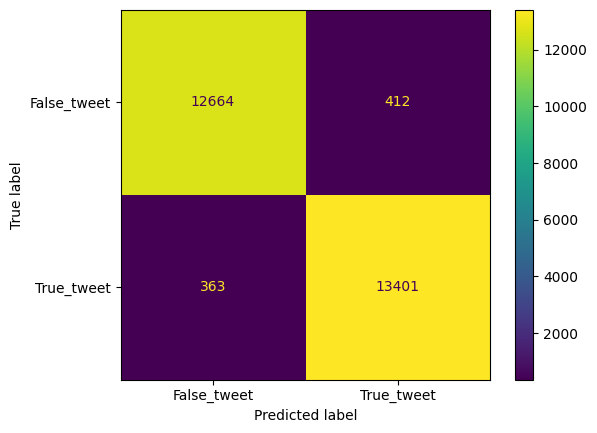

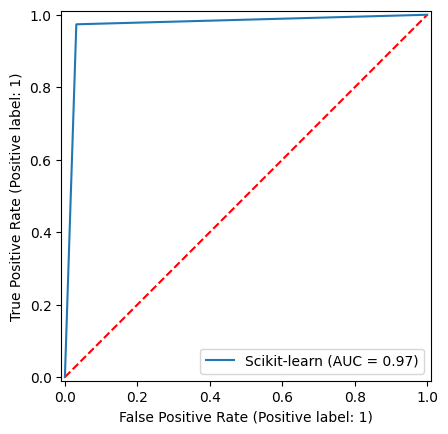

In [20]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
sk_model = MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=2, batch_size=32,
                      random_state=seed, validation_fraction=0.2, verbose=True)

# Train the model
sk_model.fit(X_train, y_train)

# Make predictions
model_pred = sk_model.predict(X_test)

# Evaluate the model
evaluate_model(y_test, model_pred, 'Scikit-learn')

## Tensorflow

Epoch 1/2
2684/2684 [==============================] - 10s 3ms/step - loss: 0.1658 - accuracy: 0.9435 - val_loss: 0.1027 - val_accuracy: 0.9651
Epoch 2/2
839/839 [==============================] - 1s 2ms/step

Evaluation results for Tensorflow Multi-layer Perceptron: 
Accuracy: 0.975
Precision: 0.969
TPR: 0.982
TNR: 0.966
F1_Score: 0.975
AUC_ROC: 0.974 

              precision    recall  f1-score   support

 False_tweet       0.98      0.97      0.97     13076
  True_tweet       0.97      0.98      0.98     13764

    accuracy                           0.97     26840
   macro avg       0.97      0.97      0.97     26840
weighted avg       0.97      0.97      0.97     26840

[[12637   439]
 [  242 13522]]


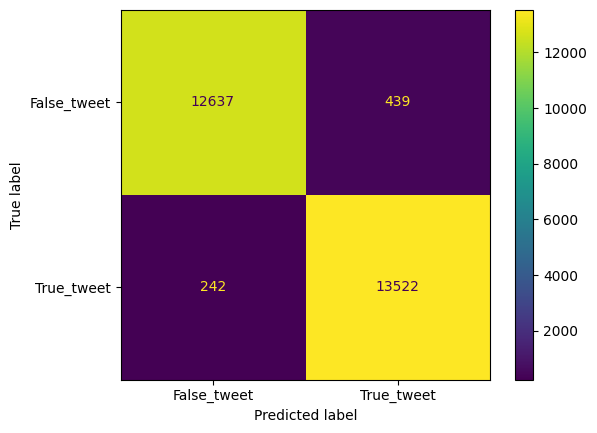

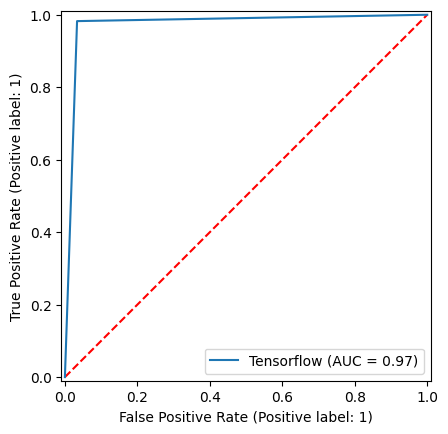

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build the model
tf_model = Sequential([
    Dense(8, input_dim=X_train.shape[1], activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

tf_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

tf_model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2, verbose=1)

predictions = tf_model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

# Evaluate the model
evaluate_model(y_test, predictions, 'Tensorflow')

## PyTorch

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [23]:
# Convert data to PyTorch tensors
dataset = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).float().view(-1, 1))

# Create DataLoader for batch processing
dataloader = DataLoader(dataset, batch_size=32)

In [24]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 8),
    nn.ReLU(),
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(2):
    model.train()
    running_loss = 0.0
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{2}], Loss: {running_loss/len(dataloader):.4f}')

Epoch [1/2], Loss: 0.1561
Epoch [2/2], Loss: 0.0946



Evaluation results for PyTorch Multi-layer Perceptron: 
Accuracy: 0.968
Precision: 0.963
TPR: 0.976
TNR: 0.96
F1_Score: 0.969
AUC_ROC: 0.968 

              precision    recall  f1-score   support

 False_tweet       0.97      0.96      0.97     13076
  True_tweet       0.96      0.98      0.97     13764

    accuracy                           0.97     26840
   macro avg       0.97      0.97      0.97     26840
weighted avg       0.97      0.97      0.97     26840

[[12555   521]
 [  333 13431]]


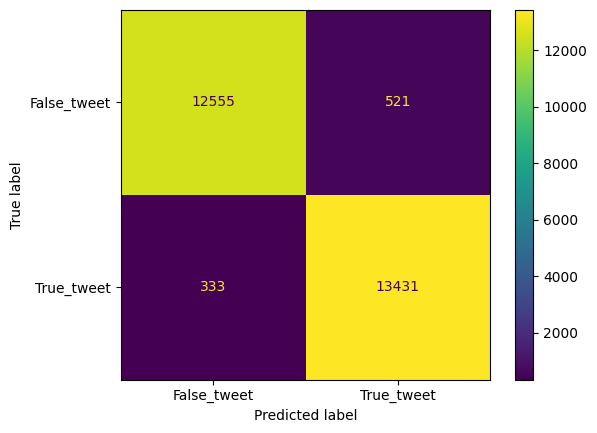

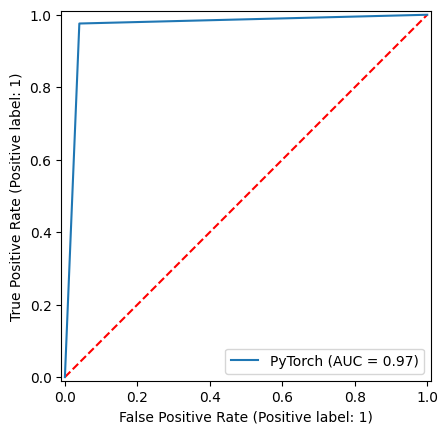

In [25]:
# Put the model in evaluation mode
model.eval()

# Disable gradient calculation for inference
with torch.no_grad():
    # Predict the outputs for the test set
    outputs = model(torch.tensor(X_test).float())

    # Convert probabilities to binary predictions (0 or 1)
    predictions = (outputs > 0.5).int()

# Evaluate the model
evaluate_model(y_test, predictions, 'PyTorch')

In [26]:
# Convert lists to a single DataFrame
bin_dict_of_lists = {
    "Bin_Model": bin_model,
    "Bin_Accuracy": bin_accuracy,
    "Bin_Precision": bin_precision,
    "Bin_TPR": bin_tpr,
    "Bin_TNR": bin_tnr,
    "Bin_F1_Score": bin_f1_score,
    "Bin_AUC_ROC": bin_auc_roc
}

bin_all_results = pd.DataFrame(bin_dict_of_lists)
bin_all_results

,Bin_Model,Bin_Accuracy,Bin_Precision,Bin_TPR,Bin_TNR,Bin_F1_Score,Bin_AUC_ROC
0,Scikit-learn,0.971,0.970,0.974,0.968,0.972,0.971
1,Tensorflow,0.975,0.969,0.982,0.966,0.975,0.974
2,PyTorch,0.968,0.963,0.976,0.960,0.969,0.968


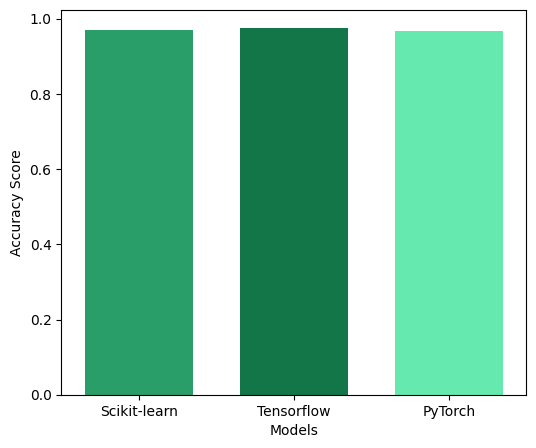

In [27]:
plt.figure(figsize=(6,5))
sns.barplot(data=bin_all_results, x='Bin_Model',  y='Bin_Accuracy', width=0.7, palette=['#17B169', '#018749', '#4FFFB0'])

plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.show()

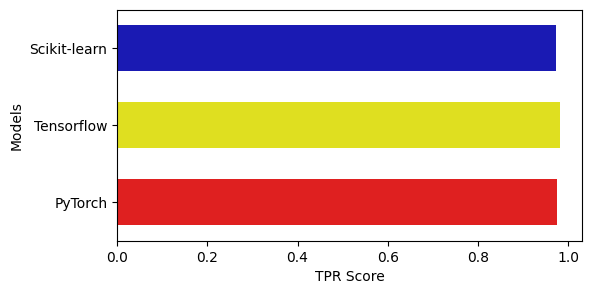

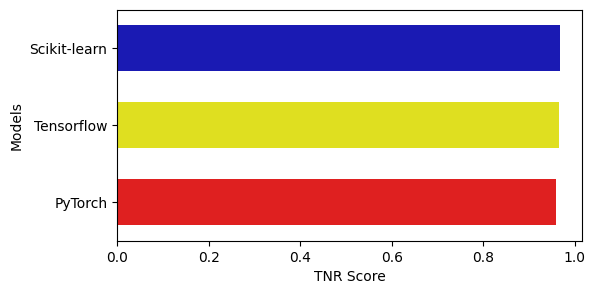

In [28]:
# Show TPR & TNR of all models
custom_palette = ["mediumblue", "yellow", "red"]

plt.figure(figsize=(6,3))
sns.barplot(data=bin_all_results, x='Bin_TPR', y='Bin_Model', width=0.6, palette=custom_palette)
plt.xlabel("TPR Score")
plt.ylabel("Models")
plt.show()

plt.figure(figsize=(6,3))
sns.barplot(data=bin_all_results, x='Bin_TNR', y='Bin_Model', width=0.6, palette=custom_palette)
plt.xlabel("TNR Score")
plt.ylabel("Models")
plt.show()

# Save the best model

In [29]:
import pickle

# Save the fitted vectorizer to a file
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [30]:
# Save the keras model
tf_model.save('tf_model.h5')